# Homework (15 pts): Random walks

The following questions pertain to a 3D random walk in continuous space at discrete time steps.

---
1. (3 pts) Create an array `walkers` of the appropriate shape to hold the 3D positions of 30,000 random walkers across 1,000 time steps.

In [1]:
import numpy as np

numTimeSteps = 1000
numWalkers = 30000

walkers = np.zeros((numTimeSteps, numWalkers, 3))

2. (3 pts) With all walkers starting at position (0,0,0), simulate and store their positions across all time steps in the `walkers` array given that on every time step they move by a random amount between -1 and 1 (e.g. 0.2, -0.7, etc.) in each dimension.

In [2]:
jumps = np.random.uniform(-1, 1, (numTimeSteps-1, numWalkers, 3))

walkers[1:,:,:] = np.cumsum(jumps, axis=0)

3. (3 pts) Create 3D scatter plots showing the position of all walkers at time points 1, 100 and 999. Use suplot to create an array of plots with each plot being for a different time point. !!! Make sure your axes limits are the same for all plots so that it is visually obvious what is going on. Label your plot axes appropriately and indicate the time step in the plot titles. *Hint:* I did not cover 3D scatter plots in class or setting axis limits, so you'll have to research this on your own. There are plenty of Matplotlib tutorials for 3D scatter plots out there. Or feel free to use a different plotting package if you want.

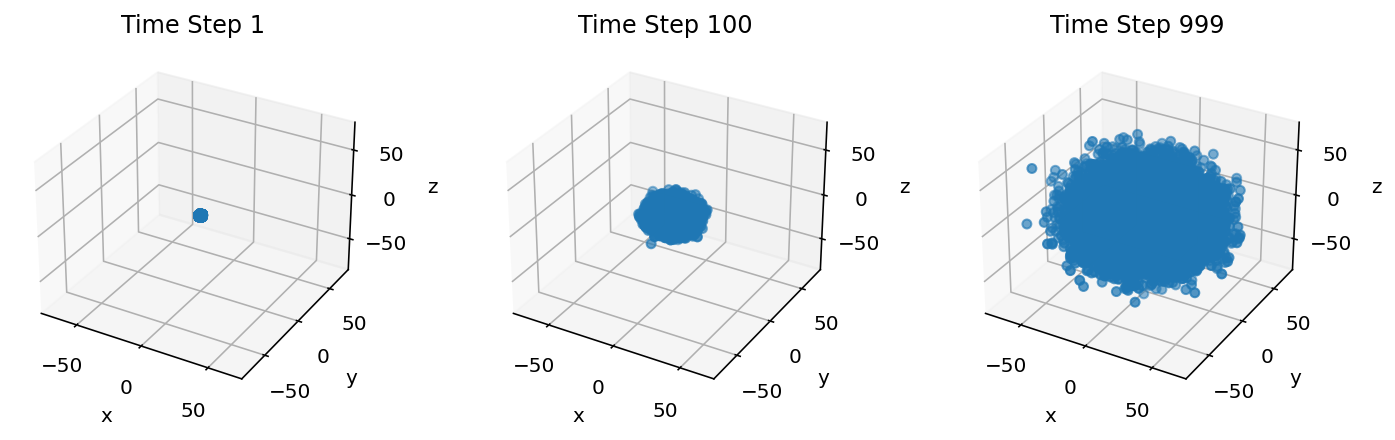

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

xmin = walkers[:,:,0].min()
xmax = walkers[:,:,0].max()
ymin = walkers[:,:,1].min()
ymax = walkers[:,:,1].max()
zmin = walkers[:,:,2].min()
zmax = walkers[:,:,2].max()

plt.figure(figsize=(10,3))
for i, t in enumerate([1, 100, 999]):
    x = walkers[t,:,0]
    y = walkers[t,:,1]
    z = walkers[t,:,2]
    ax = plt.subplot(1, 3, i+1, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'Time Step {t}')
plt.tight_layout();

4. (3 pts) Plot a line that traces the 3D path of walker 50 during the simulation. Make sure axes labels and title are appropriate.

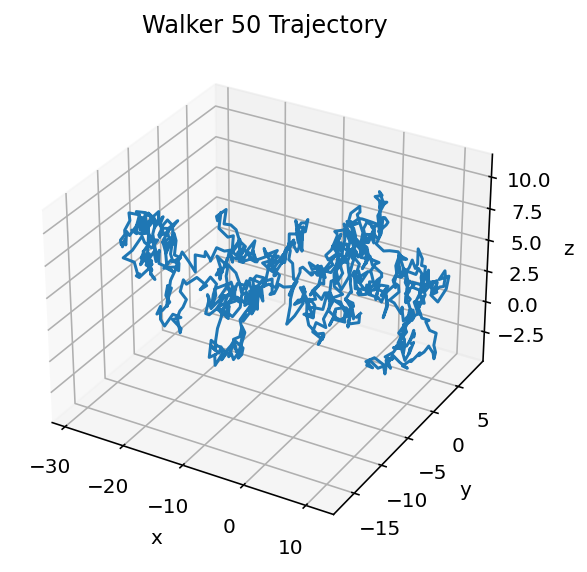

In [4]:
x = walkers[:,50,0]
y = walkers[:,50,1]
z = walkers[:,50,2]
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Walker 50 Trajectory')
plt.tight_layout();

5. (3 pts) Repeat the simulation from #2 above, but constrain the walkers to be within a cube with corners at (0, 0, 0) and (50, 50, 50). Furthermore, any walker that crosses over the cube boundary should be warped to the other side of the cube. For example, if a walker attempts to move from (0.1, 0, 0) to (-0.2, 0, 0), that walker should end up at (49.8, 0, 0). The same behavior in all dimensions. Also plot your results as in #3 above.

In [5]:
numTimeSteps = 1000
numWalkers = 30000

walkers = np.zeros((numTimeSteps, numWalkers, 3))

for t in range(1, numTimeSteps):
    jumps = np.random.uniform(-1, 1, (numWalkers, 3))
    newPositions = walkers[t-1,:,:] + jumps
    newPositions[newPositions < 0] += 50
    newPositions[newPositions > 50] -= 50
    walkers[t,:,:] = newPositions

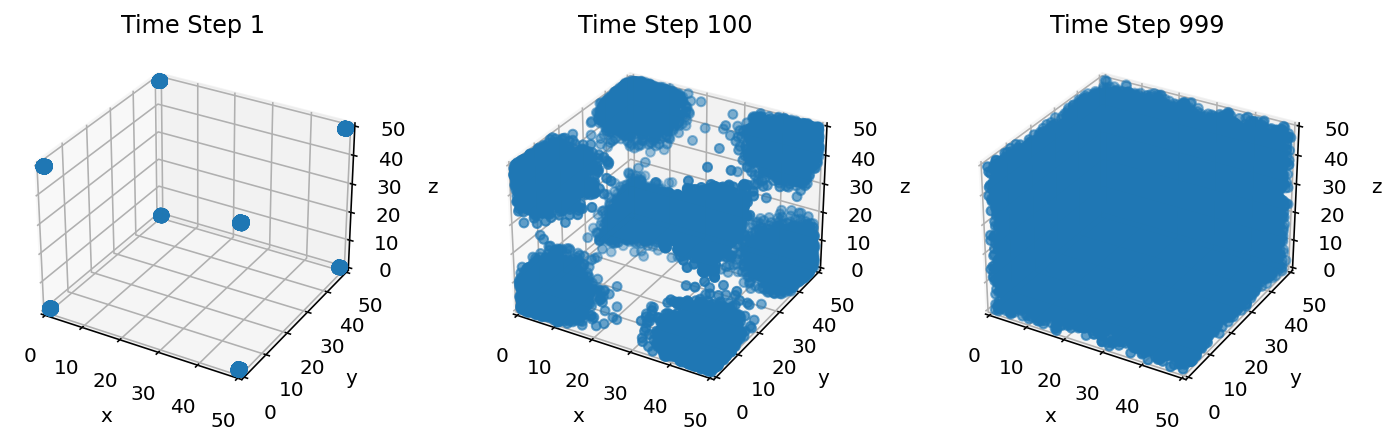

In [6]:
plt.figure(figsize=(10,3))
for i, t in enumerate([1, 100, 999]):
    x = walkers[t,:,0]
    y = walkers[t,:,1]
    z = walkers[t,:,2]
    ax = plt.subplot(1, 3, i+1, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlim([0, 50])
    ax.set_ylim([0, 50])
    ax.set_zlim([0, 50])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'Time Step {t}')
plt.tight_layout();